In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("dataset/train-data.csv")

Analysing data

In [3]:
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 446.8+ KB


In [5]:
df_train=df_train.drop("New_Price",axis=1)


In [6]:
df_train.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [7]:
df_train=df_train.drop("Unnamed: 0",axis=1)


In [8]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [9]:
df_train.duplicated().sum()

0

NO Duplicate values in dataset

Checking null or nan value value

In [10]:
feature = [feature for feature in df_train.columns]
feature

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'Price']

In [11]:
features = [x for x in feature if df_train[x].isnull().sum()]
features

['Mileage', 'Engine', 'Power', 'Seats']

In [12]:
for feature in features:
    print(feature,df_train[feature].isnull().sum())

Mileage 2
Engine 36
Power 36
Seats 42


droping missing value row

In [13]:
df_train = df_train.dropna()

In [14]:
df_train.shape

(5975, 12)

In [15]:
df_train.nunique()

Name                 1855
Location               11
Year                   22
Kilometers_Driven    3080
Fuel_Type               4
Transmission            2
Owner_Type              4
Mileage               442
Engine                145
Power                 371
Seats                   9
Price                1369
dtype: int64

In [16]:
df_train['Name'].value_counts()

Mahindra XUV500 W8 2WD                           49
Maruti Swift VDI                                 45
Honda City 1.5 S MT                              34
Maruti Swift Dzire VDI                           34
Maruti Swift VDI BSIV                            31
                                                 ..
Honda Jazz 1.2 E i VTEC                           1
Volvo XC60 D5 Inscription                         1
BMW 7 Series 730Ld Design Pure Excellence CBU     1
Skoda Rapid 1.5 TDI Style                         1
Tata Indica V2 DL BSIII                           1
Name: Name, Length: 1855, dtype: int64

In [17]:
df_train['Location'].value_counts()

Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64

In [18]:
df_train['Year'].value_counts()

2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64

In [19]:
df_train['Seats'].value_counts()

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [20]:
df_train['Mileage'].value_counts()

18.9 kmpl     172
17.0 kmpl     170
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
10.98 kmpl      1
8.5 kmpl        1
21.79 kmpl      1
21.72 kmpl      1
25.01 kmpl      1
Name: Mileage, Length: 442, dtype: int64

In [21]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Data visulization matplotlib and seaborn

In [22]:
import seaborn as sns

Mumbai        13.121339
Hyderabad     12.401674
Kochi         10.845188
Coimbatore    10.610879
Pune          10.259414
Delhi          9.188285
Kolkata        8.870293
Chennai        8.200837
Jaipur         6.861925
Bangalore      5.907950
Ahmedabad      3.732218
Name: Location, dtype: float64


Mumbai        784
Hyderabad     741
Kochi         648
Coimbatore    634
Pune          613
Delhi         549
Kolkata       530
Chennai       490
Jaipur        410
Bangalore     353
Ahmedabad     223
Name: Location, dtype: int64


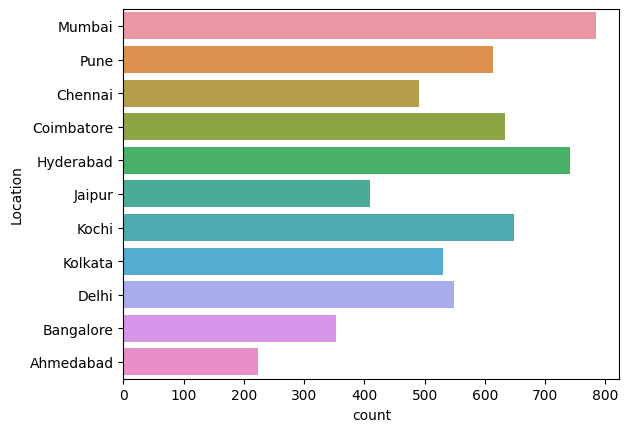

In [23]:
print(df_train["Location"].value_counts(normalize=True)*100)
sns.countplot(y='Location',data = df_train)
print(df_train['Location'].value_counts())

2014    795
2015    741
2016    740
2013    648
2017    586
2012    572
2011    461
2010    339
2018    298
2009    196
2008    169
2007    123
2019    102
2006     75
2005     55
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64

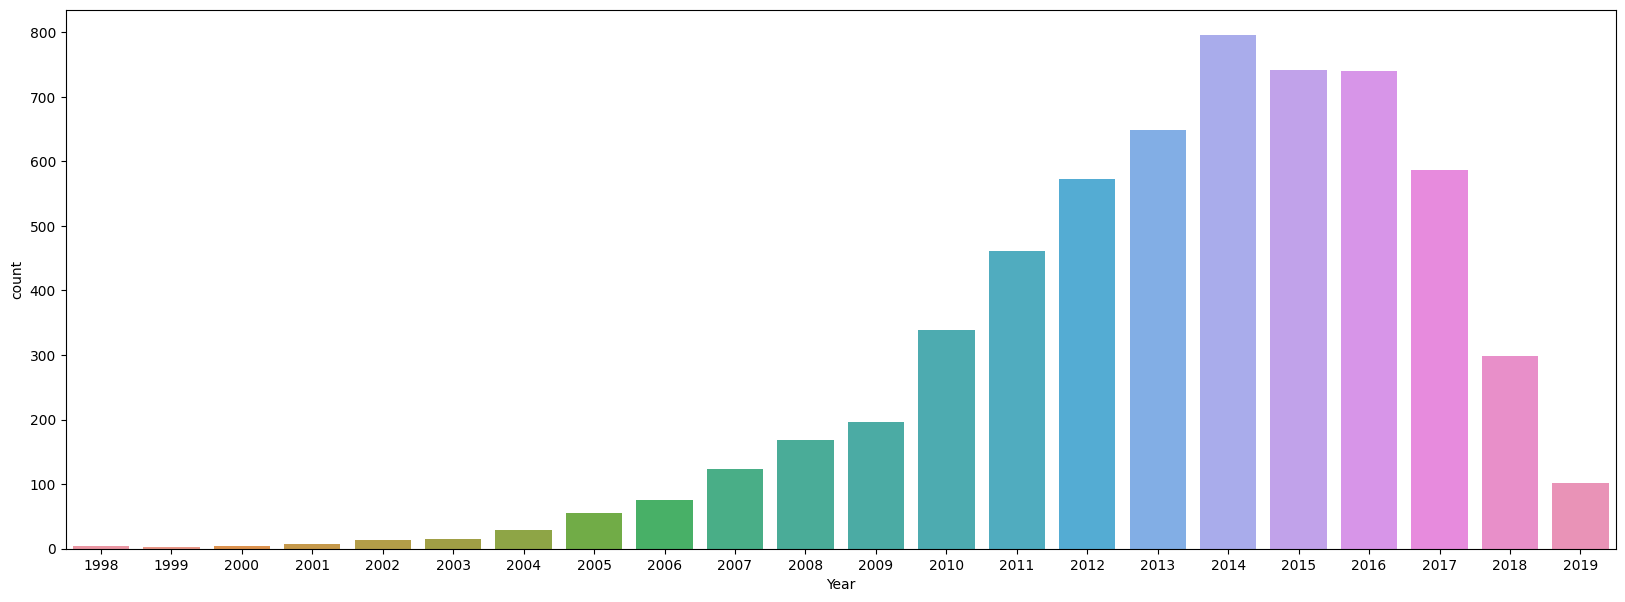

In [24]:
fig,ax=plt.subplots(figsize=(20,7))
sns.countplot(x='Year',data=df_train)
df_train['Year'].value_counts()

Diesel    3195
Petrol    2714
CNG         56
LPG         10
Name: Fuel_Type, dtype: int64

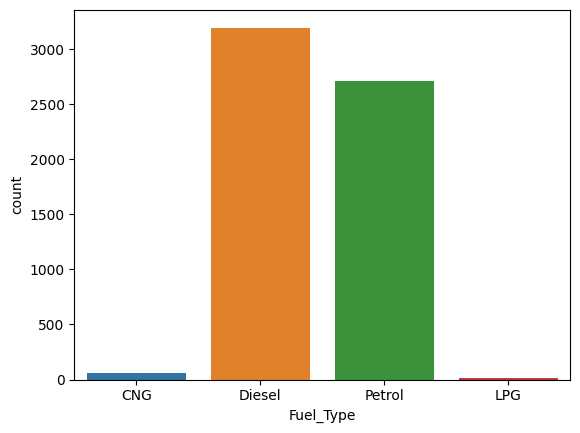

In [25]:
sns.countplot(x='Fuel_Type',data=df_train)
df_train['Fuel_Type'].value_counts()

Manual       4266
Automatic    1709
Name: Transmission, dtype: int64

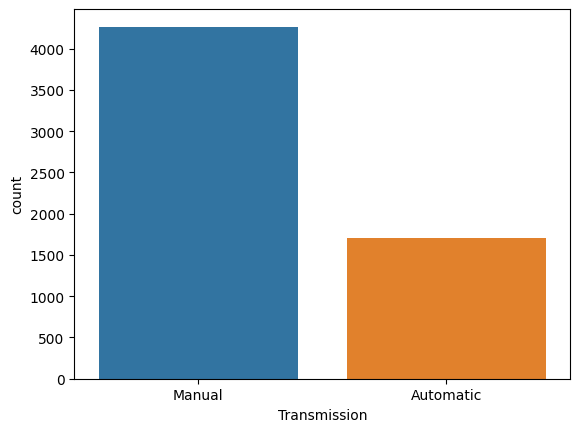

In [26]:
sns.countplot(x="Transmission",data=df_train)
df_train['Transmission'].value_counts()

First             4903
Second             953
Third              111
Fourth & Above       8
Name: Owner_Type, dtype: int64

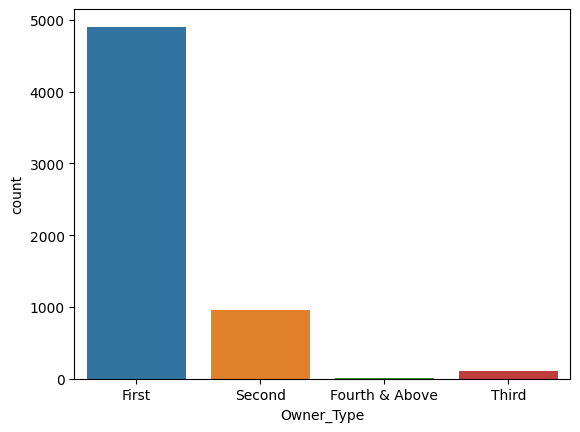

In [27]:
sns.countplot(x="Owner_Type",data=df_train)
df_train['Owner_Type'].value_counts()

5.0     5012
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64


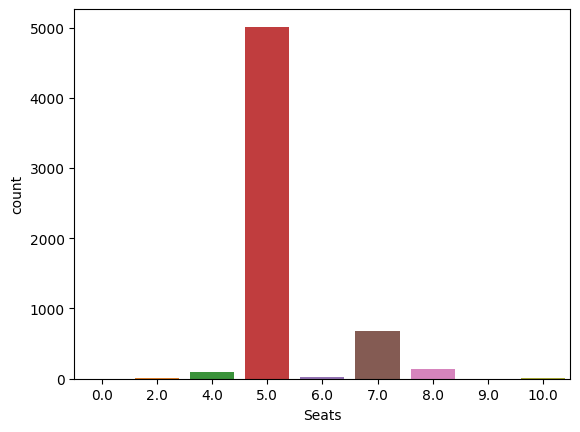

In [28]:
sns.countplot(x='Seats',data=df_train)
print(df_train.Seats.value_counts())

<AxesSubplot:xlabel='count', ylabel='Engine'>

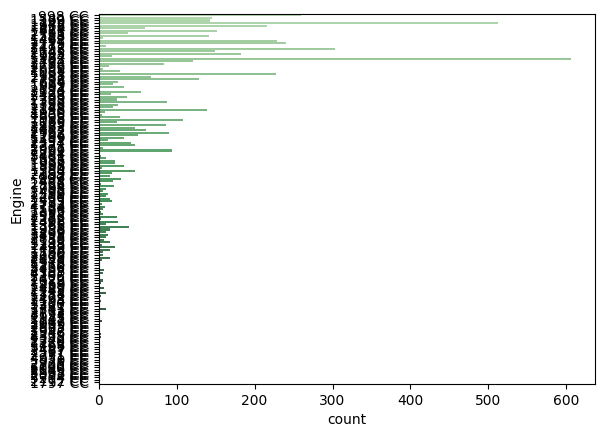

In [29]:
sns.countplot(y="Engine", data=df_train, palette="Greens_d")

<AxesSubplot:xlabel='count', ylabel='Engine'>

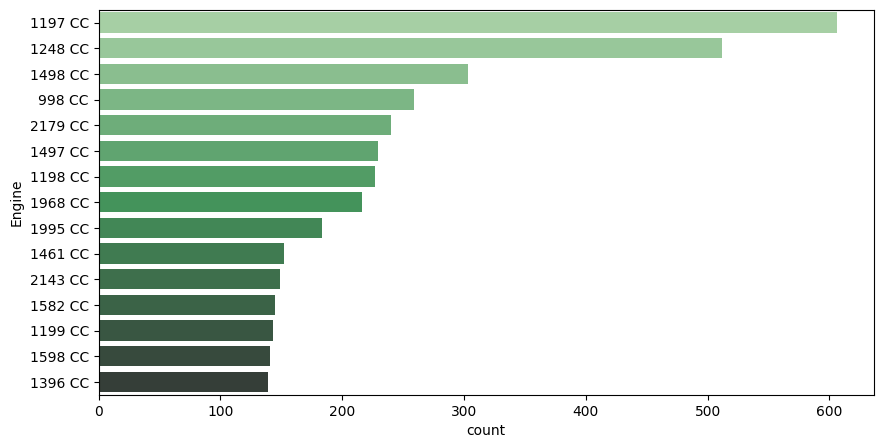

In [30]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(y="Engine", data=df_train, palette="Greens_d",
              order=df_train.Engine.value_counts().iloc[:15].index)

In [31]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

check all parameter with dtypes is abject

In [32]:
df_train['Location'].values

array(['Mumbai', 'Pune', 'Chennai', ..., 'Jaipur', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [33]:
df_train['Fuel_Type'].values

array(['CNG', 'Diesel', 'Petrol', ..., 'Diesel', 'Petrol', 'Diesel'],
      dtype=object)

In [34]:
df_train['Transmission'].values

array(['Manual', 'Manual', 'Manual', ..., 'Manual', 'Manual', 'Manual'],
      dtype=object)

In [35]:
df_train['Owner_Type'].values

array(['First', 'First', 'First', ..., 'Second', 'First', 'First'],
      dtype=object)

In [36]:
df_train['Mileage'].values

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', ..., '14.0 kmpl',
       '18.9 kmpl', '25.44 kmpl'], dtype=object)

In [37]:
df_train['Power'].values

array(['58.16 bhp', '126.2 bhp', '88.7 bhp', ..., '112 bhp', '67.1 bhp',
       '57.6 bhp'], dtype=object)

In [38]:
df_train['Engine'].values

array(['998 CC', '1582 CC', '1199 CC', ..., '2498 CC', '998 CC', '936 CC'],
      dtype=object)

In [39]:
df_train['Power_n'] = df_train['Power'].str.extract(r'(\d+.\d+)').astype('float')

In [40]:
df_train['Mileage_n']=df_train["Mileage"].str.extract(r'(\d+.\d+)').astype('float')

In [41]:
df_train['Engine_n']=df_train['Engine'].str.extract(r'(\d+)').astype("int")

In [42]:
df_train['Seat_n'] = df_train["Seats"].astype("int")

In [43]:
df_train['Power_n'].values

array([ 58.16, 126.2 ,  88.7 , ..., 112.  ,  67.1 ,  57.6 ])

In [44]:
df_train['Engine_n'].values

array([ 998, 1582, 1199, ..., 2498,  998,  936])

In [45]:
df_train['Mileage_n'].values

array([26.6 , 19.67, 18.2 , ..., 14.  , 18.9 , 25.44])

In [46]:
df_train['Seat_n'].values

array([5, 5, 5, ..., 8, 5, 5])

#Countinuous feature and outlinear 

In [47]:
featur_continuous=['Price','Kilometers_Driven']

c:\Users\ASUS\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


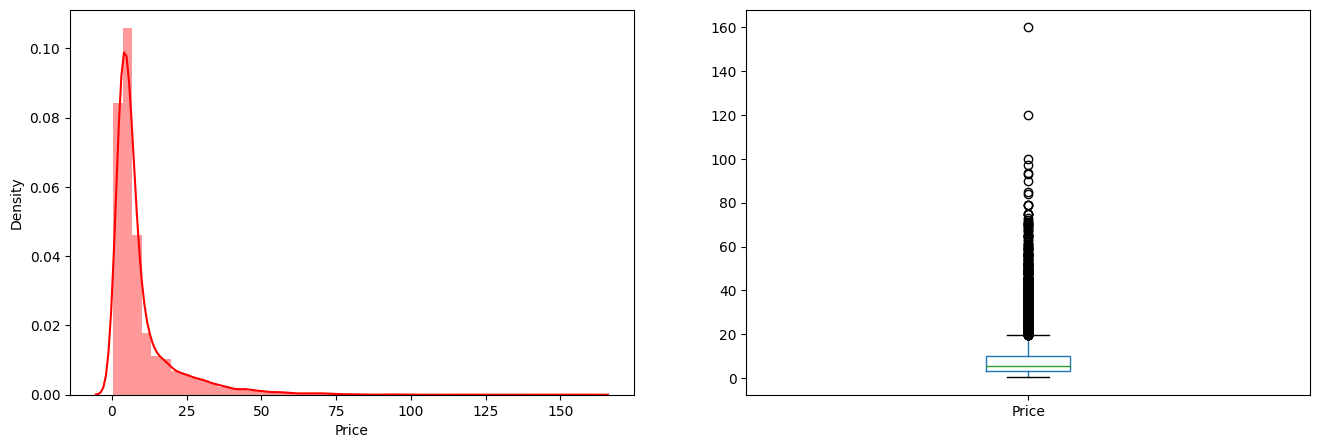

In [48]:
#price
plt.subplot(121)
sns.distplot(df_train['Price'],color="r");

plt.subplot(122)
df_train['Price'].plot.box(figsize=(16,5))

plt.show()


c:\Users\ASUS\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


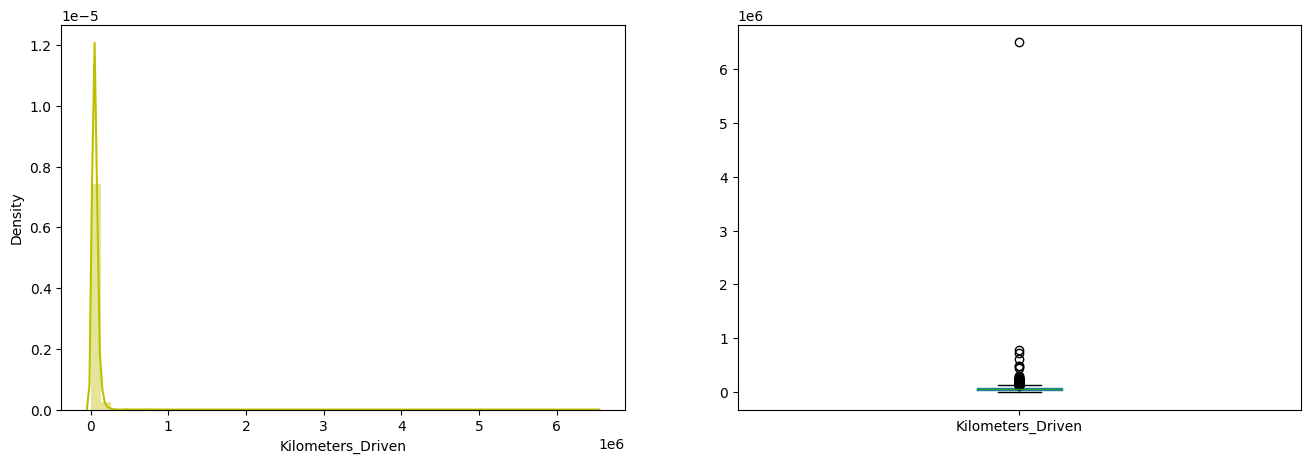

In [49]:
#price
plt.subplot(121)
sns.distplot(df_train['Kilometers_Driven'],color="y");

plt.subplot(122)
df_train['Kilometers_Driven'].plot.box(figsize=(16,5))

plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


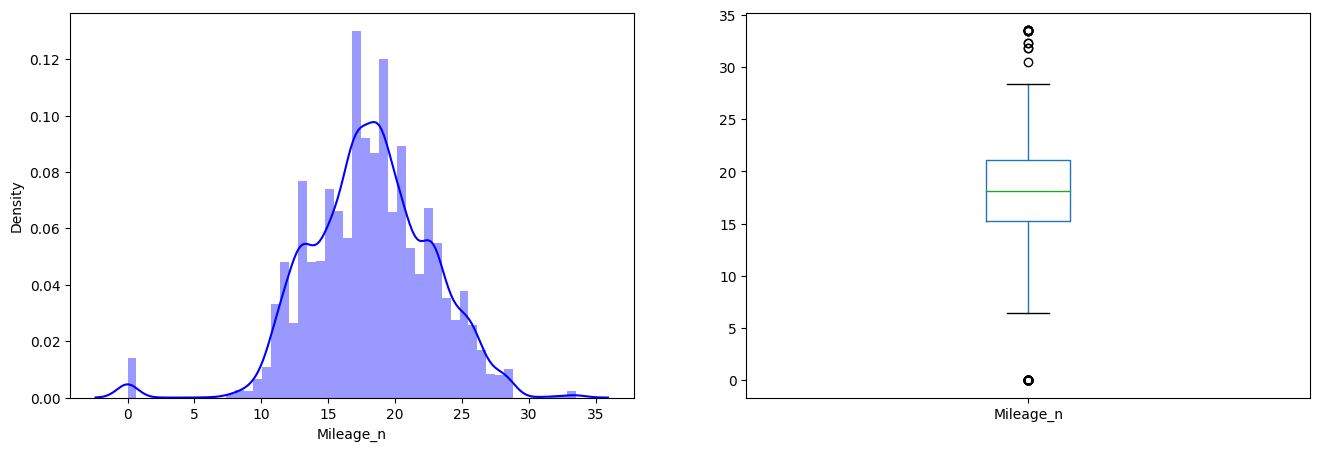

In [50]:
#milage
plt.subplot(121)
sns.distplot(df_train['Mileage_n'],color="b");

plt.subplot(122)
df_train['Mileage_n'].plot.box(figsize=(16,5))

plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


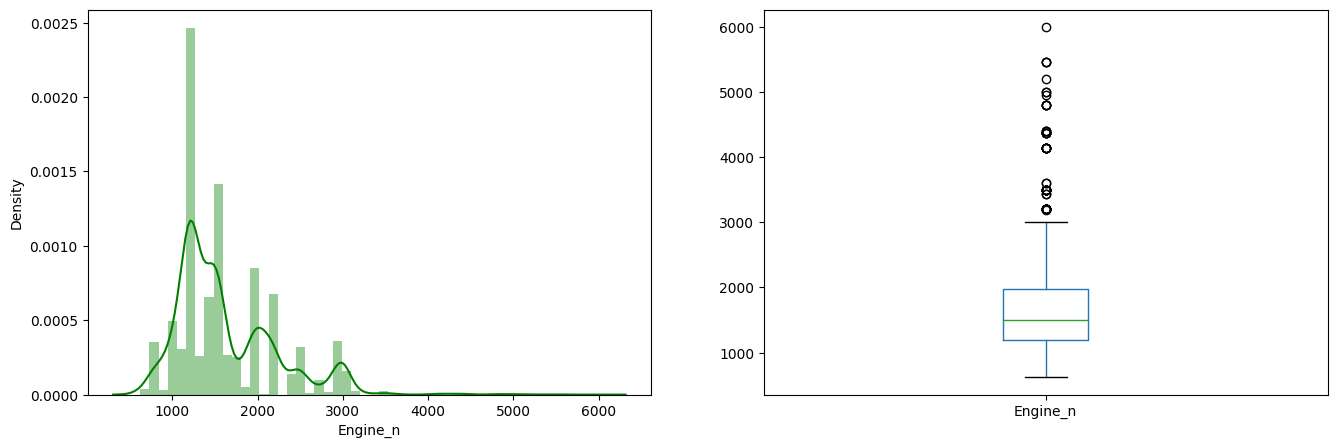

In [51]:
#engine cc
plt.subplot(121)
sns.distplot(df_train['Engine_n'],color="g");

plt.subplot(122)
df_train['Engine_n'].plot.box(figsize=(16,5))

plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


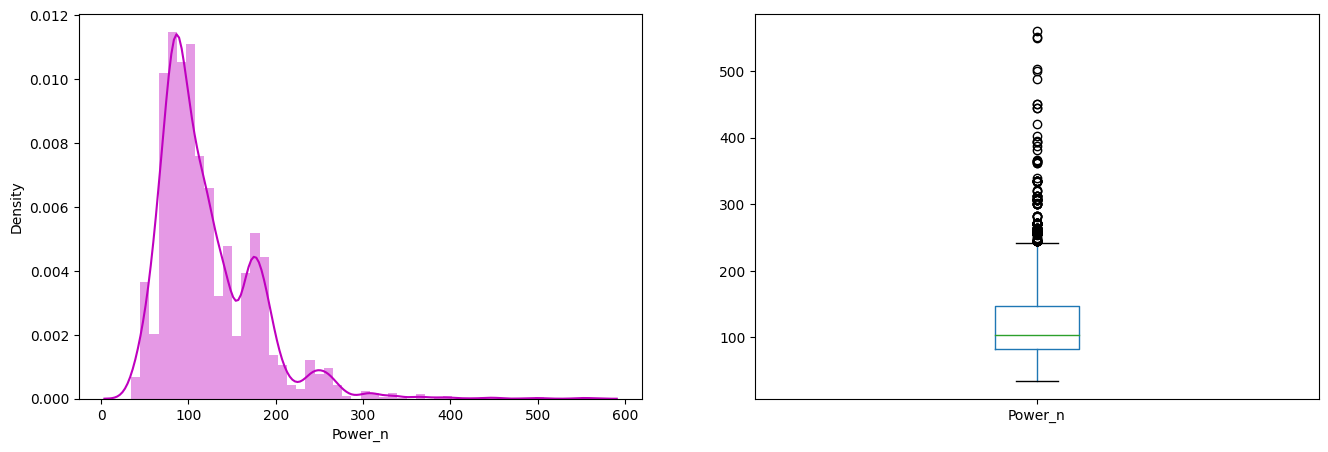

In [52]:
#power
plt.subplot(121)
sns.distplot(df_train['Power_n'],color="m");

plt.subplot(122)
df_train['Power_n'].plot.box(figsize=(16,5))

plt.show()


Bivarient analysis

<AxesSubplot:xlabel='Price', ylabel='Location'>

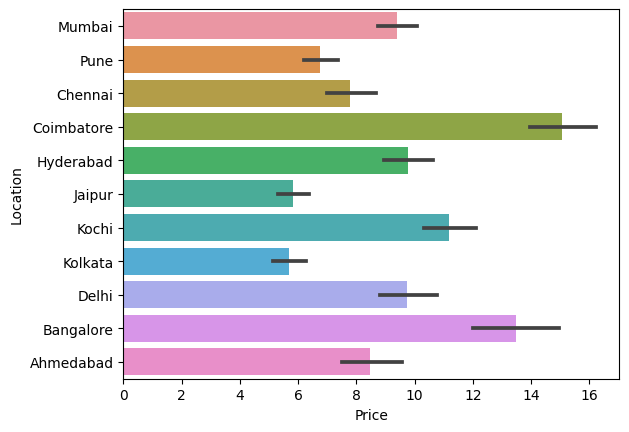

In [53]:
#location vs price

sns.barplot(y="Location", x="Price", data=df_train)

<AxesSubplot:xlabel='Price', ylabel='Location'>

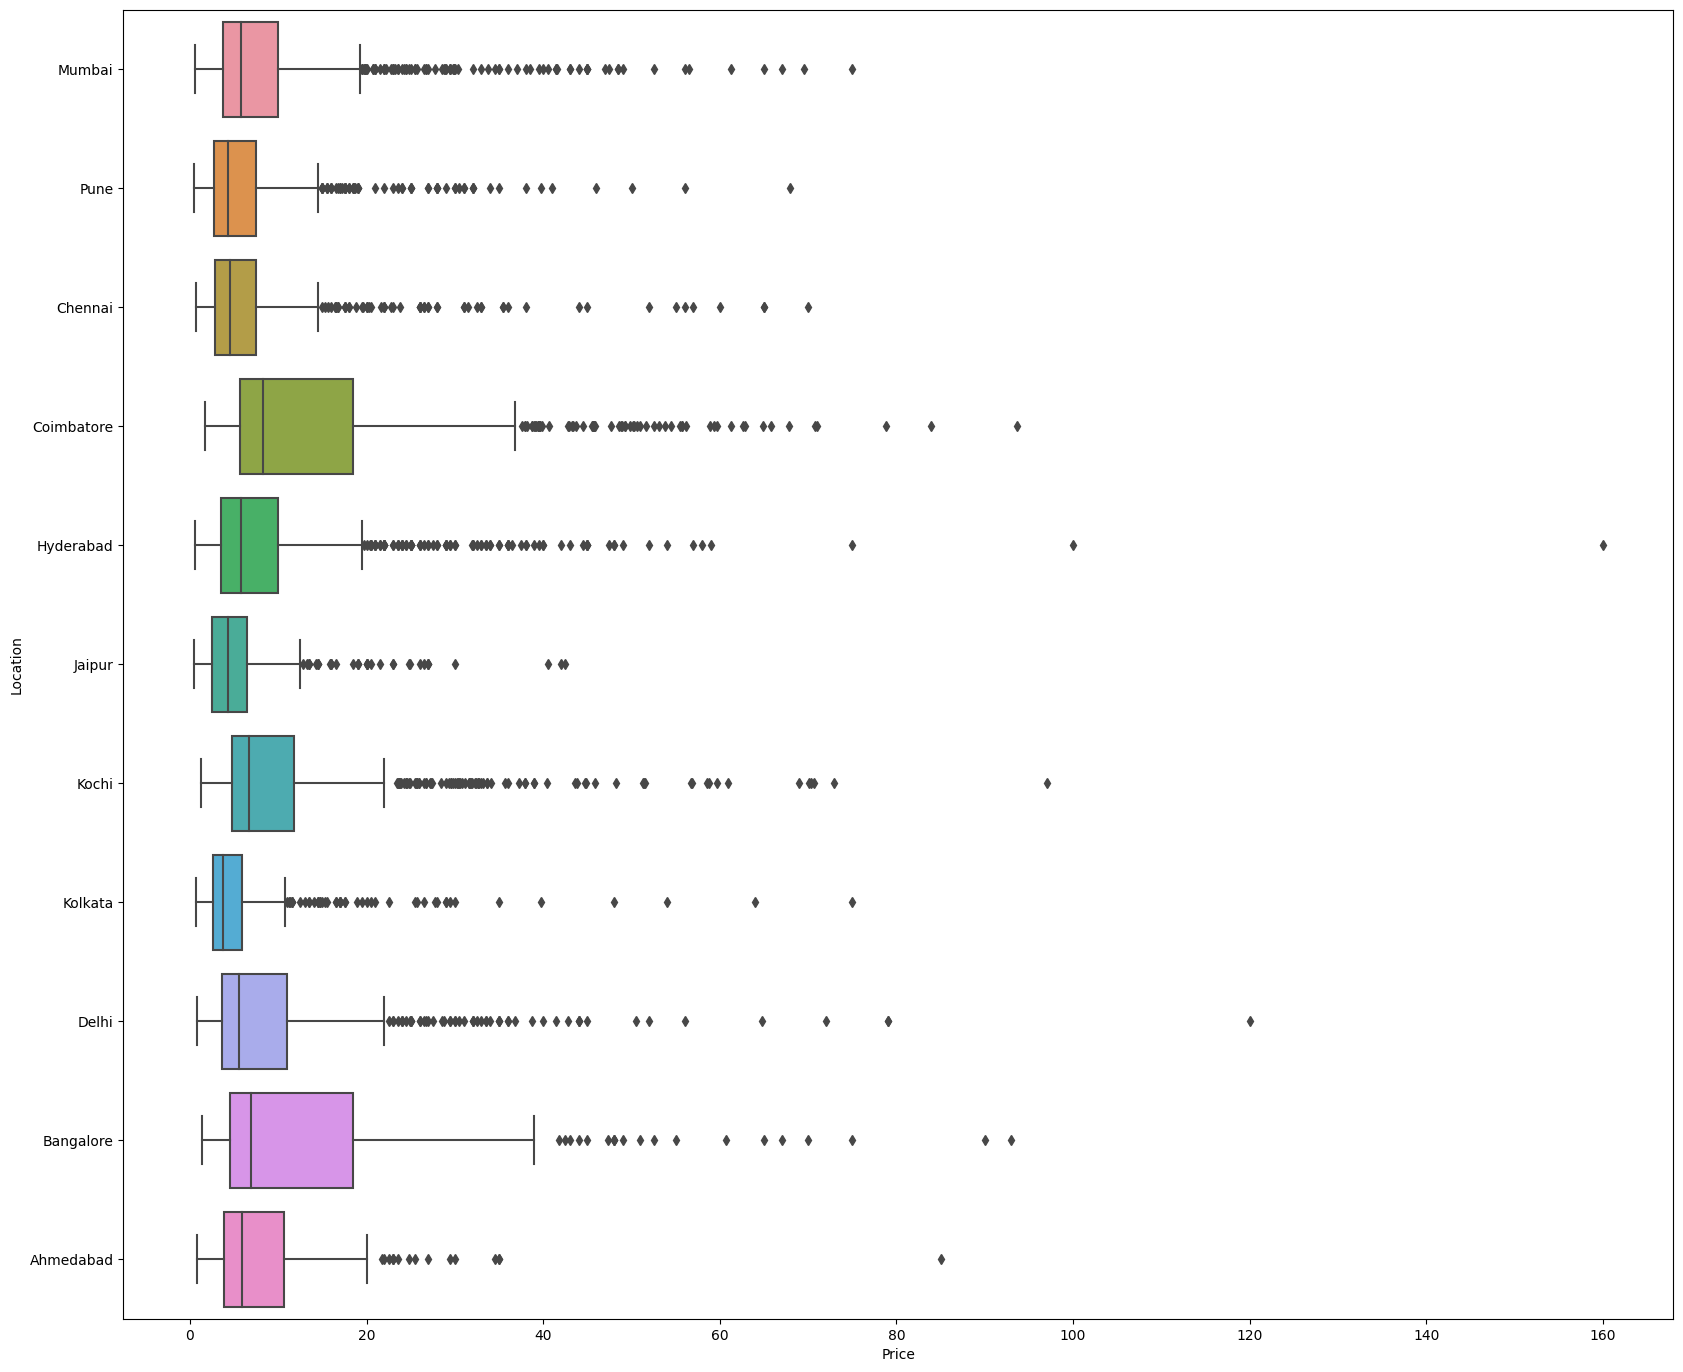

In [54]:
fig_dims = (20, 17)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="Price", y="Location", data=df_train )

<AxesSubplot:xlabel='Price', ylabel='Transmission'>

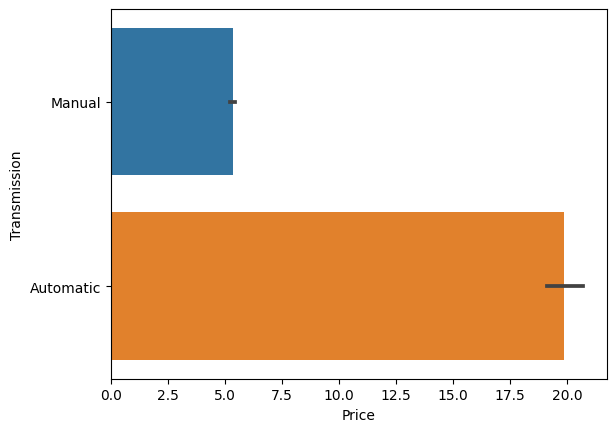

In [55]:
#Transmission vs Price
sns.barplot(y="Transmission", x="Price", data=df_train)

<AxesSubplot:xlabel='Price', ylabel='Fuel_Type'>

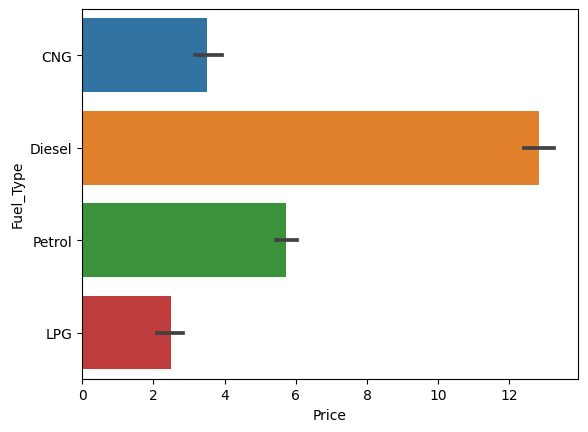

In [56]:
# fuel type vs price
sns.barplot(y="Fuel_Type", x="Price", data=df_train)


<AxesSubplot:xlabel='Price', ylabel='Owner_Type'>

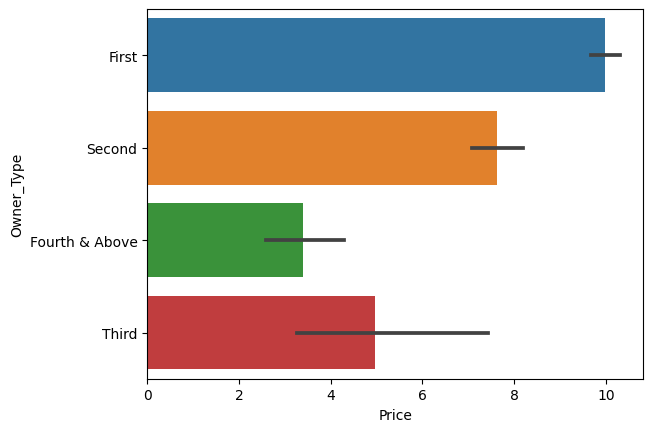

In [57]:
#Owner_Type vs price
sns.barplot(y="Owner_Type", x="Price", data=df_train)

<AxesSubplot:xlabel='Seats', ylabel='Price'>

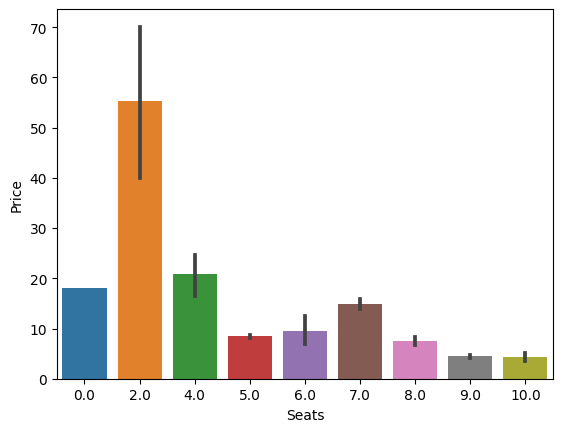

In [58]:
#seat vs Price
sns.barplot(x='Seats',y='Price',data=df_train)

# split full car name into company and Model name

In [59]:
company = []
model = []
Name= list(df_train['Name'])

In [60]:
for i in Name:
    i=i.split(" ",1)
    company.append(i[0])
    model.append(i[1])

In [61]:
df_train["Company"] = company
df_train["Model"] = model

In [62]:
df_train.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Power_n', 'Mileage_n', 'Engine_n', 'Seat_n', 'Company',
       'Model'],
      dtype='object')

In [63]:
df_train['Company'].nunique()

31

In [64]:
df_train['Model'].nunique()

1855

<AxesSubplot:xlabel='Price', ylabel='Company'>

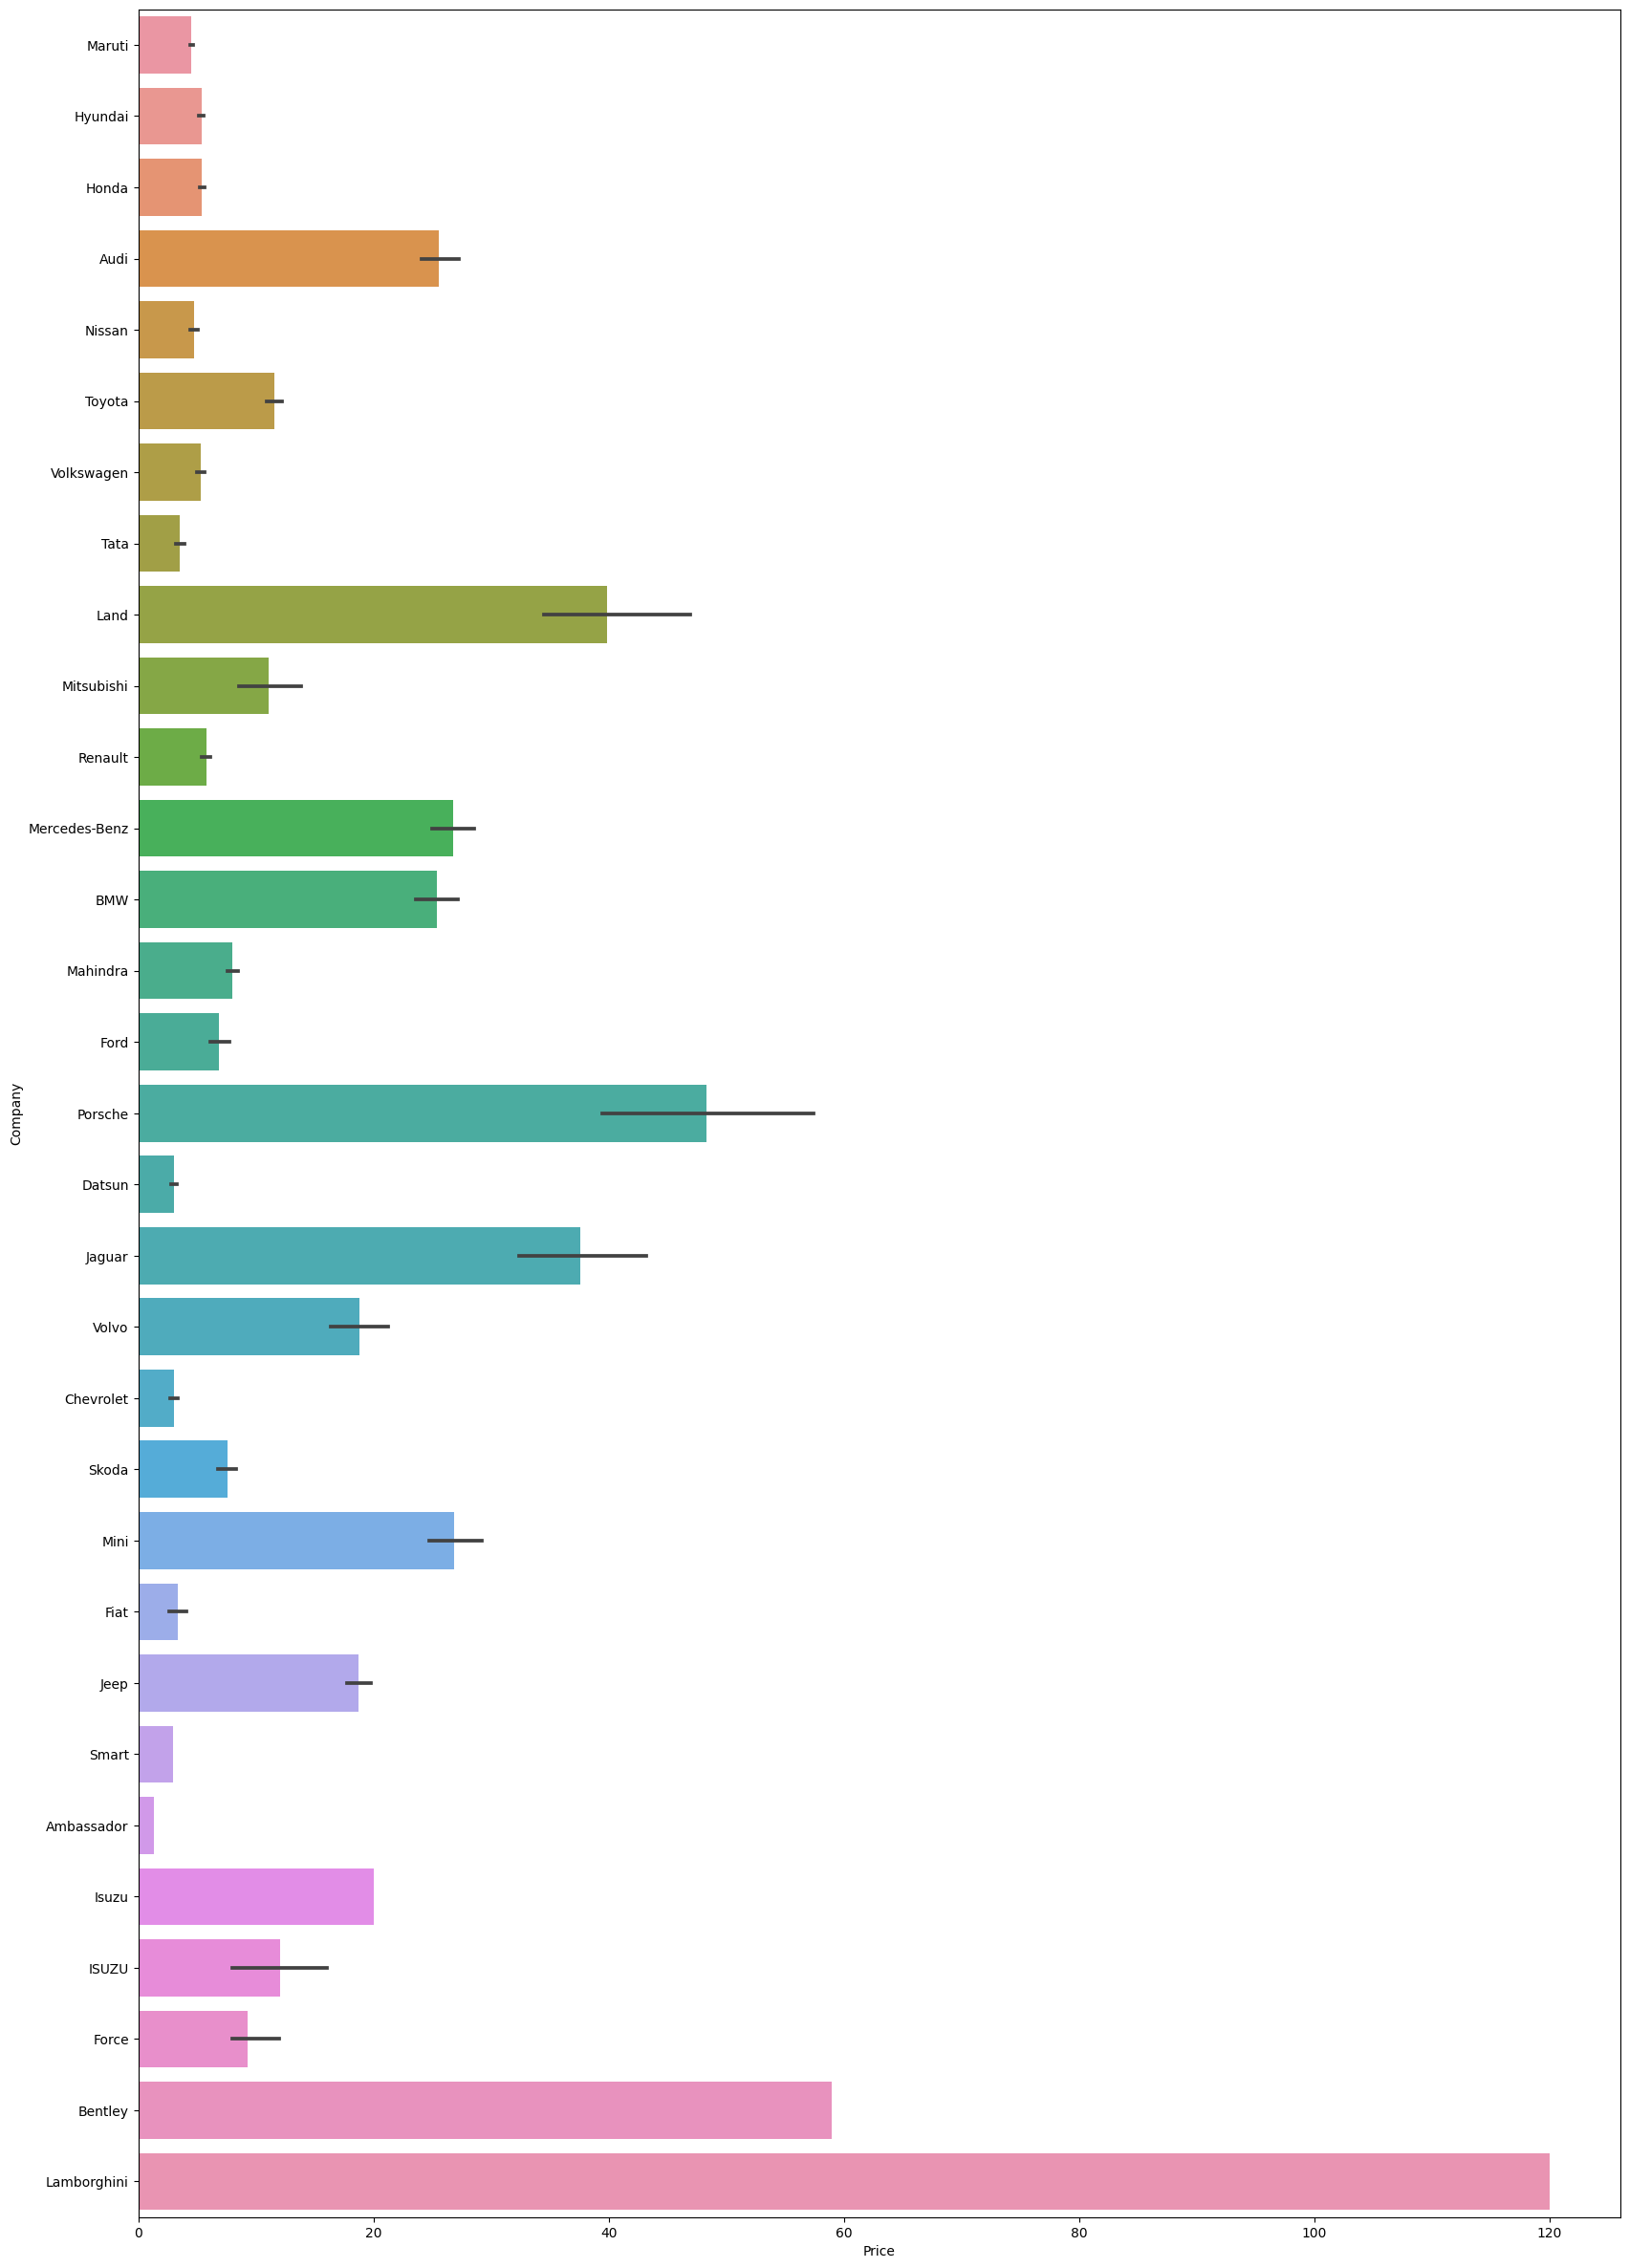

In [65]:
fig_dims = (20, 30)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y="Company", x="Price", data=df_train)

continues feaatuare and price visulization
scatter plot

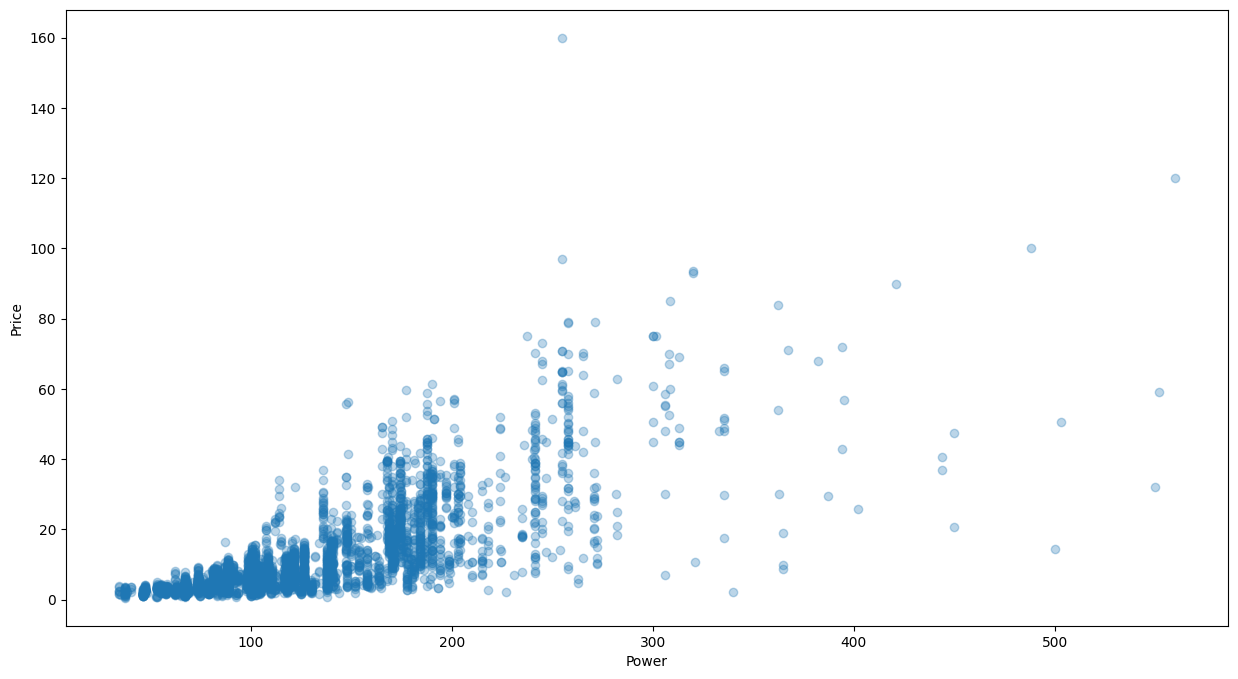

In [66]:
#Power vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Power_n'],df_train['Price'],alpha=0.3)
plt.xlabel("Power")
plt.ylabel('Price')
plt.show()

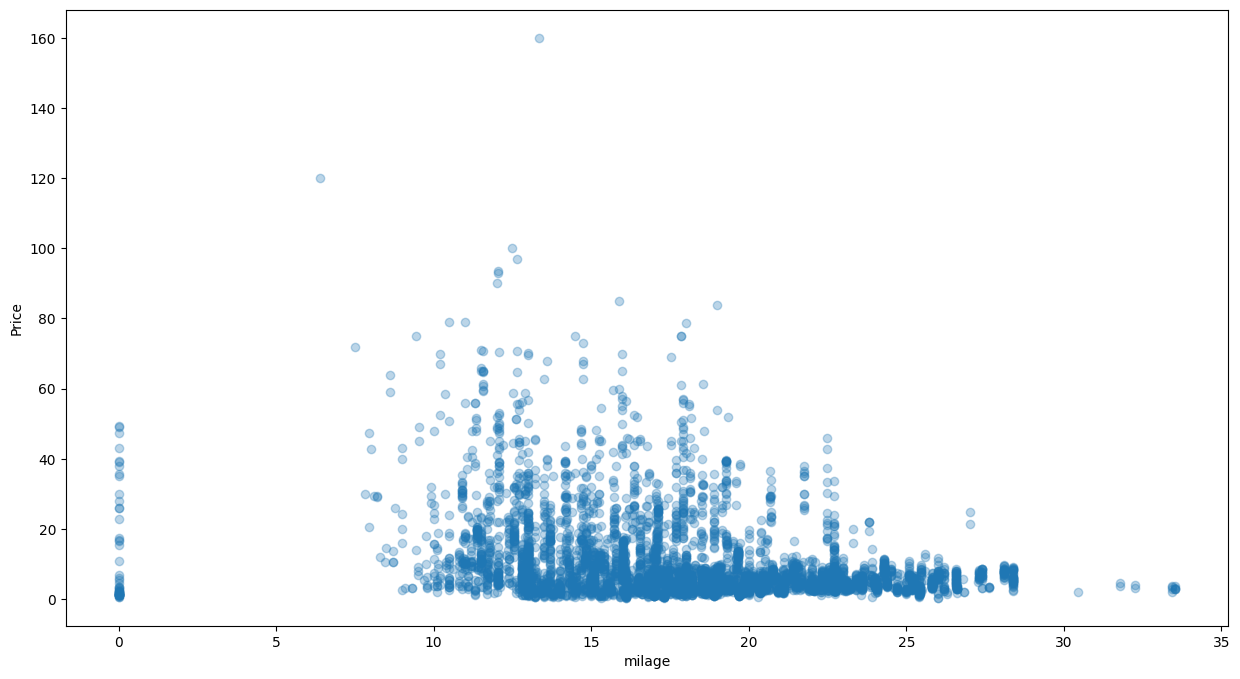

In [67]:
#Mileaage vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Mileage_n'],df_train['Price'],alpha=0.3)
plt.xlabel("milage")
plt.ylabel('Price')
plt.show()

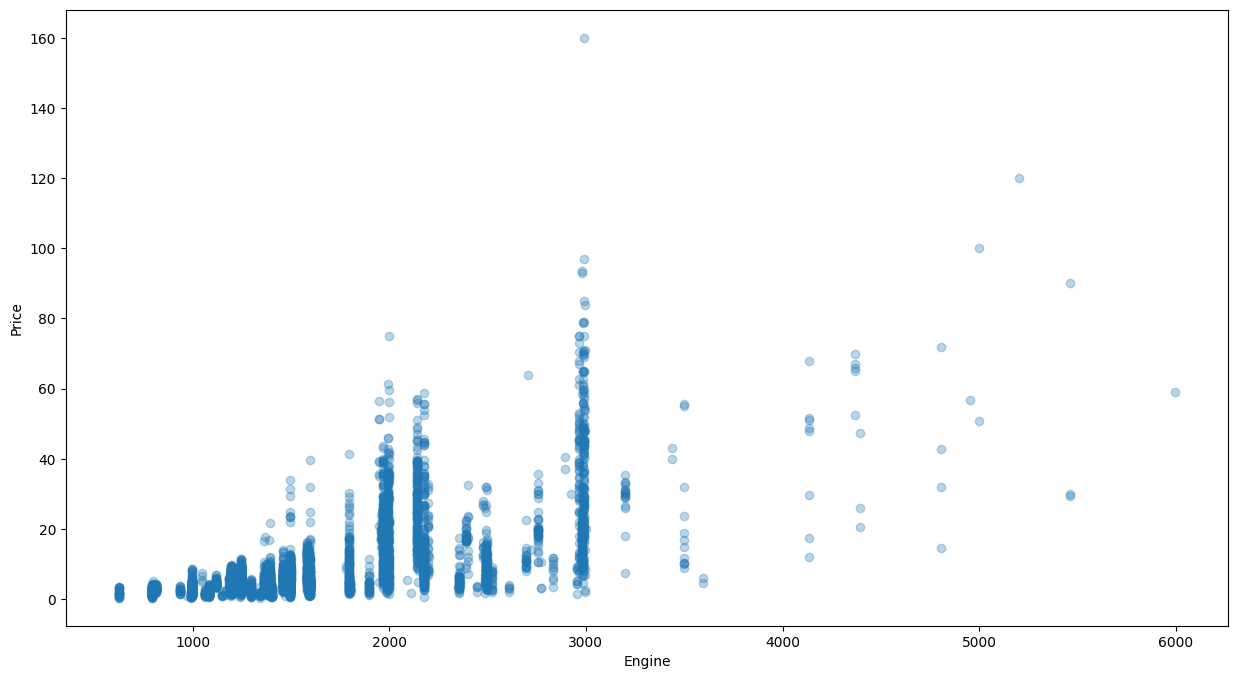

In [68]:
#Engine vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Engine_n'],df_train['Price'],alpha=0.3)
plt.xlabel("Engine")
plt.ylabel('Price')
plt.show()

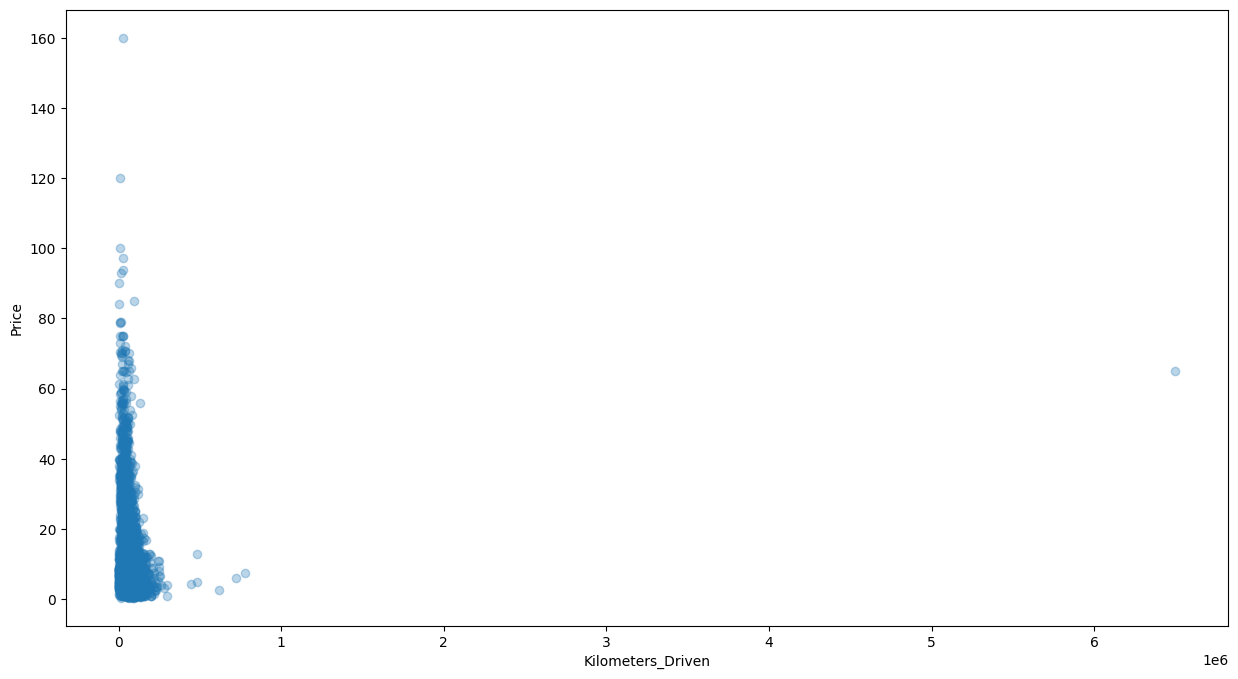

In [69]:
#Kilometers_Driven vs Price
plt.figure(figsize=(15,8))
plt.scatter(df_train['Kilometers_Driven'],df_train['Price'],alpha=0.3)
plt.xlabel("Kilometers_Driven")
plt.ylabel('Price')
plt.show()

# OUtlier


<AxesSubplot:xlabel='Power_n'>

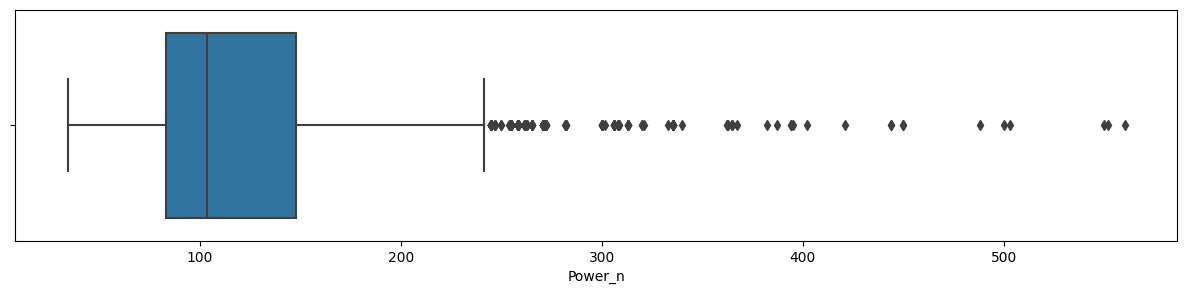

In [70]:
#Power
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Power_n',data=df_train,ax=ax)

<AxesSubplot:xlabel='Mileage_n'>

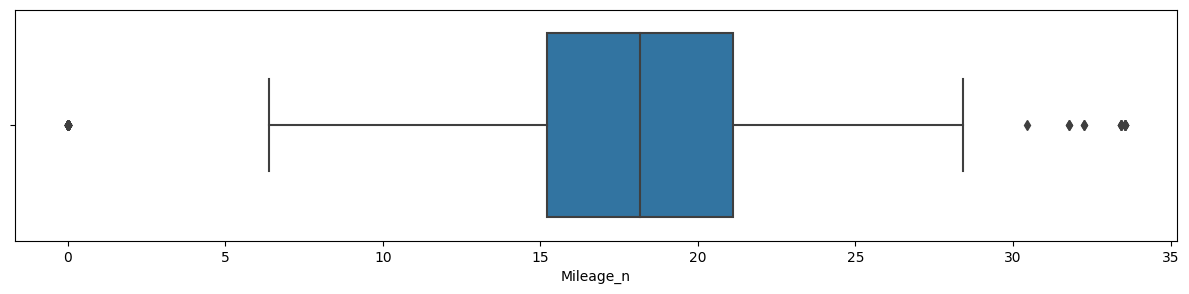

In [71]:
#MIleage
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Mileage_n',data=df_train,ax=ax)

<AxesSubplot:xlabel='Engine_n'>

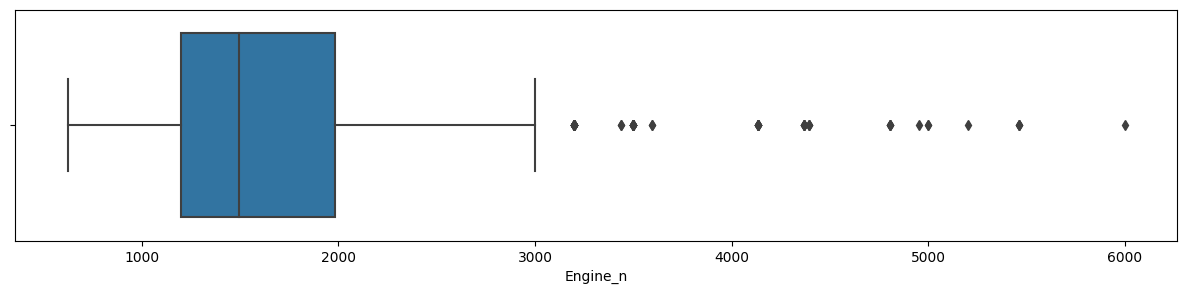

In [72]:
#Engine 
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Engine_n',data=df_train,ax=ax)

<AxesSubplot:xlabel='Kilometers_Driven'>

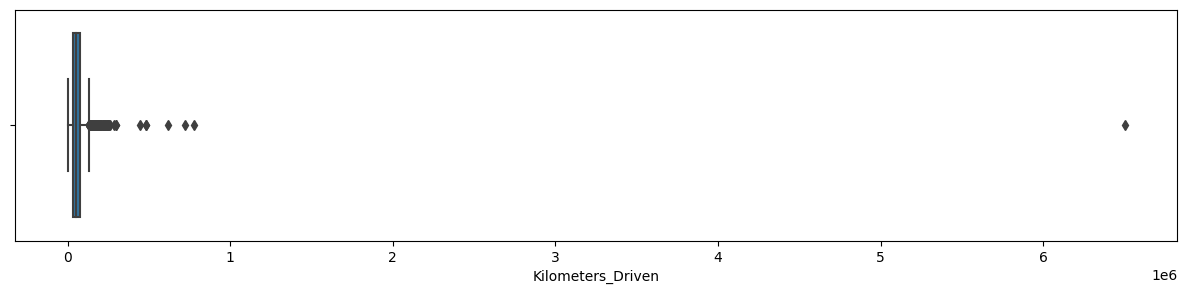

In [73]:
#Kilometers_Driven
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Kilometers_Driven',data=df_train,ax=ax)

outlier and its remover

In [74]:
outlier_fetures=['Kilometers_Driven','Price','Power_n','Mileage_n','Engine_n']

In [75]:
for feature in outlier_fetures:
    print(feature)
    print('max threshold :',df_train[feature].quantile(0.999))
    print('min threshold :',df_train[feature].quantile(0.001))

Kilometers_Driven
max threshold : 445910.00000002625
min threshold : 1000.0
Price
max threshold : 90.07800000000225
min threshold : 0.50974
Power_n
max threshold : 489.1353000000053
min threshold : 34.2
Mileage_n
max threshold : 33.44
min threshold : 0.0
Engine_n
max threshold : 5000.0
min threshold : 624.0


In [76]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [77]:
class RemoveOutliers(BaseEstimator,TransformerMixin):
    """This class removes outliers from data.
    Note: Outlier values are hard coded
    """

    def fit (self,X,y=None):
        return self
    
    
    def transform(self,X,y=None):
        X=X[X['Kilometers_Driven']< 262000] 
            
        X=X[X['Price']<=100]
        
        X=X[X['Power_n']<= 530]
        
        X=X[X['Engine_n']<= 5900 ]
        
        return X

In [78]:
new_train_data=RemoveOutliers().fit_transform(df_train)

In [79]:
for feature in outlier_fetures:
    print(feature)
    print('max threshold :',new_train_data[feature].max())
    print('min threshold :',new_train_data[feature].min())

Kilometers_Driven
max threshold : 255000
min threshold : 171
Price
max threshold : 100.0
min threshold : 0.53
Power_n
max threshold : 503.0
min threshold : 34.2
Mileage_n
max threshold : 33.54
min threshold : 0.0
Engine_n
max threshold : 5461
min threshold : 624


In [80]:
print(df_train.shape)
print(new_train_data.shape)

(5975, 18)
(4900, 18)


<AxesSubplot:xlabel='Power_n'>

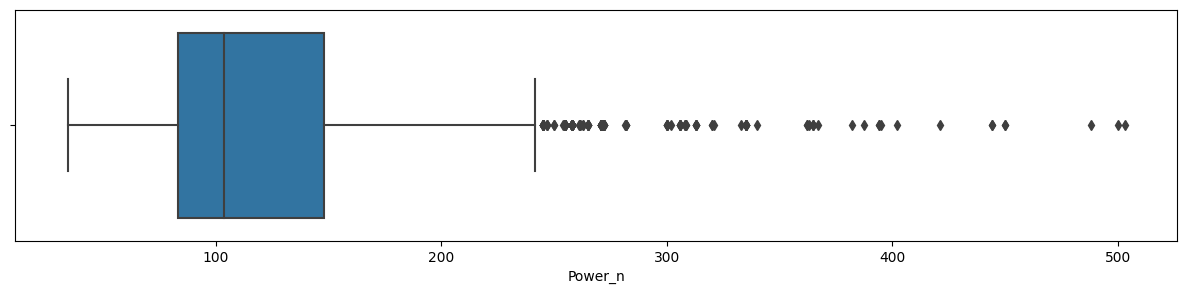

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Power_n',data=new_train_data,ax=ax)
# fig, ax = plt.subplots()
# fig.set_size_inches(15,3)
# sns.boxplot(x='Power_n',data=df_train,ax=ax)

<AxesSubplot:xlabel='Mileage_n'>

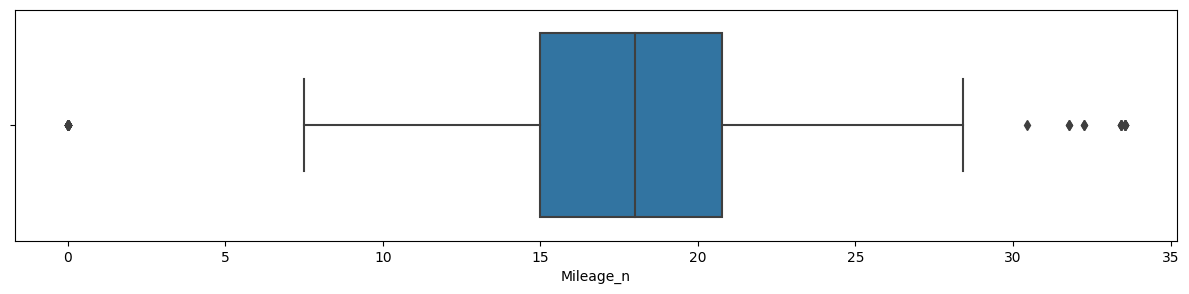

In [82]:
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Mileage_n',data=new_train_data,ax=ax)
# fig, ax = plt.subplots()
# fig.set_size_inches(15,3)
# sns.boxplot(x='Mileage_n',data=df_train,ax=ax)

<AxesSubplot:xlabel='Engine_n'>

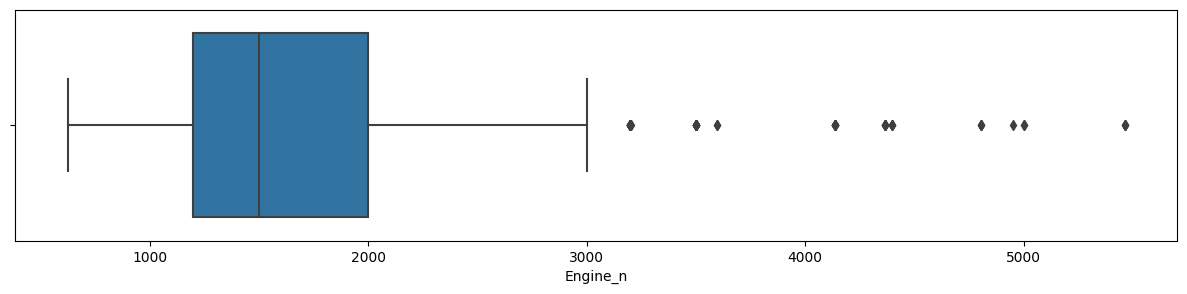

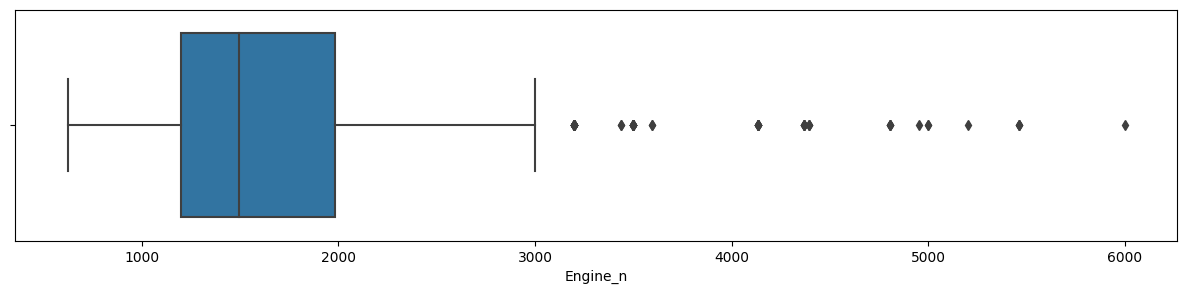

In [83]:
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Engine_n',data=new_train_data,ax=ax)
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Engine_n',data=df_train,ax=ax)

<AxesSubplot:xlabel='Kilometers_Driven'>

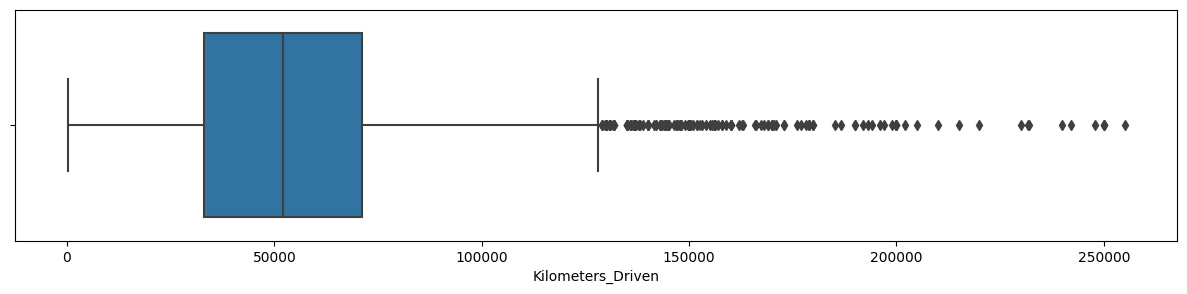

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(15,3)
sns.boxplot(x='Kilometers_Driven',data=new_train_data,ax=ax)
# fig, ax = plt.subplots()
# fig.set_size_inches(15,3)
# sns.boxplot(x='Kilometers_Driven',data=df_train,ax=ax)

# Transforming skewed features

array([[<AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:title={'center':'Power_n'}>,
        <AxesSubplot:title={'center':'Mileage_n'}>],
       [<AxesSubplot:title={'center':'Engine_n'}>, <AxesSubplot:>]],
      dtype=object)

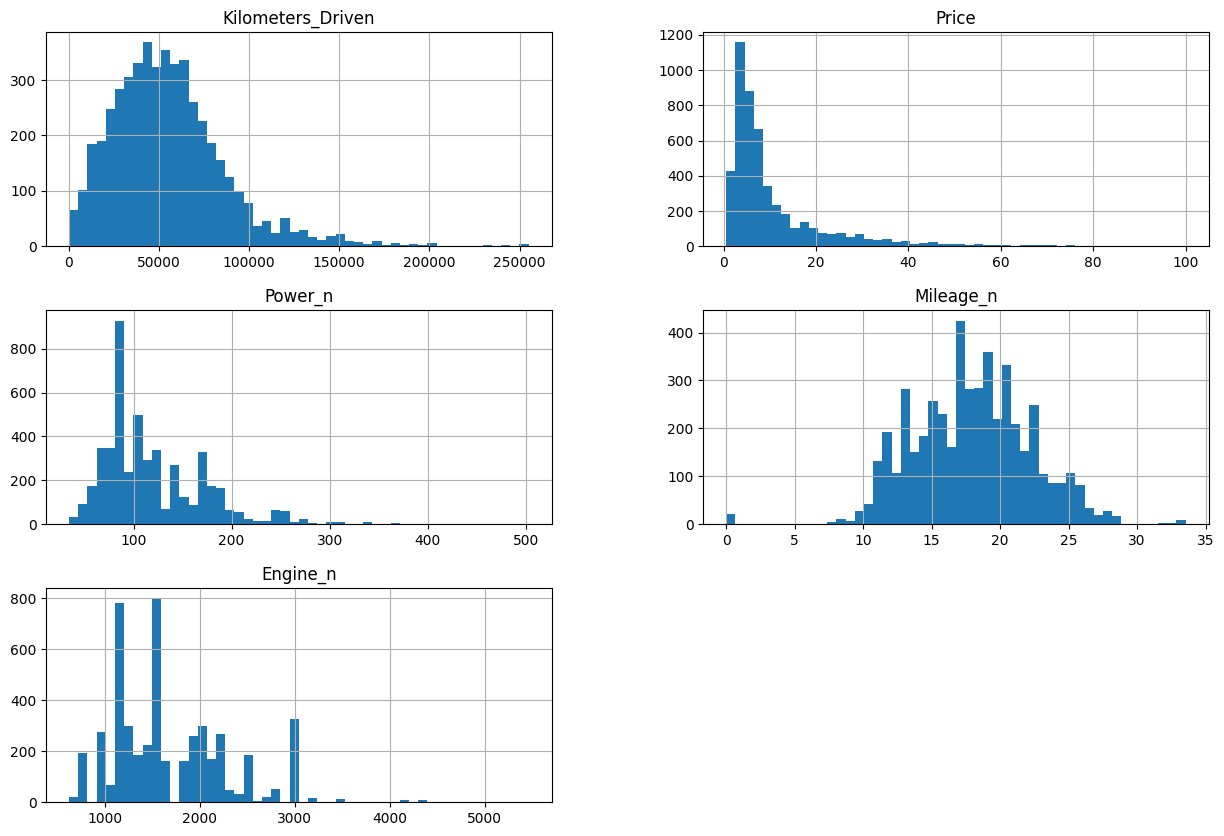

In [85]:
new_train_data[outlier_fetures].hist(bins=50,figsize=(15,10))

In [86]:
final_data=new_train_data.drop(['Name','Mileage','Engine','Power','Seats','Model'],axis=1)

In [87]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4900 non-null   object 
 1   Year               4900 non-null   int64  
 2   Kilometers_Driven  4900 non-null   int64  
 3   Fuel_Type          4900 non-null   object 
 4   Transmission       4900 non-null   object 
 5   Owner_Type         4900 non-null   object 
 6   Price              4900 non-null   float64
 7   Power_n            4900 non-null   float64
 8   Mileage_n          4900 non-null   float64
 9   Engine_n           4900 non-null   int32  
 10  Seat_n             4900 non-null   int32  
 11  Company            4900 non-null   object 
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 363.7+ KB


In [88]:
final_data['Company'].nunique()

28

In [89]:
# ordinal categorical data

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

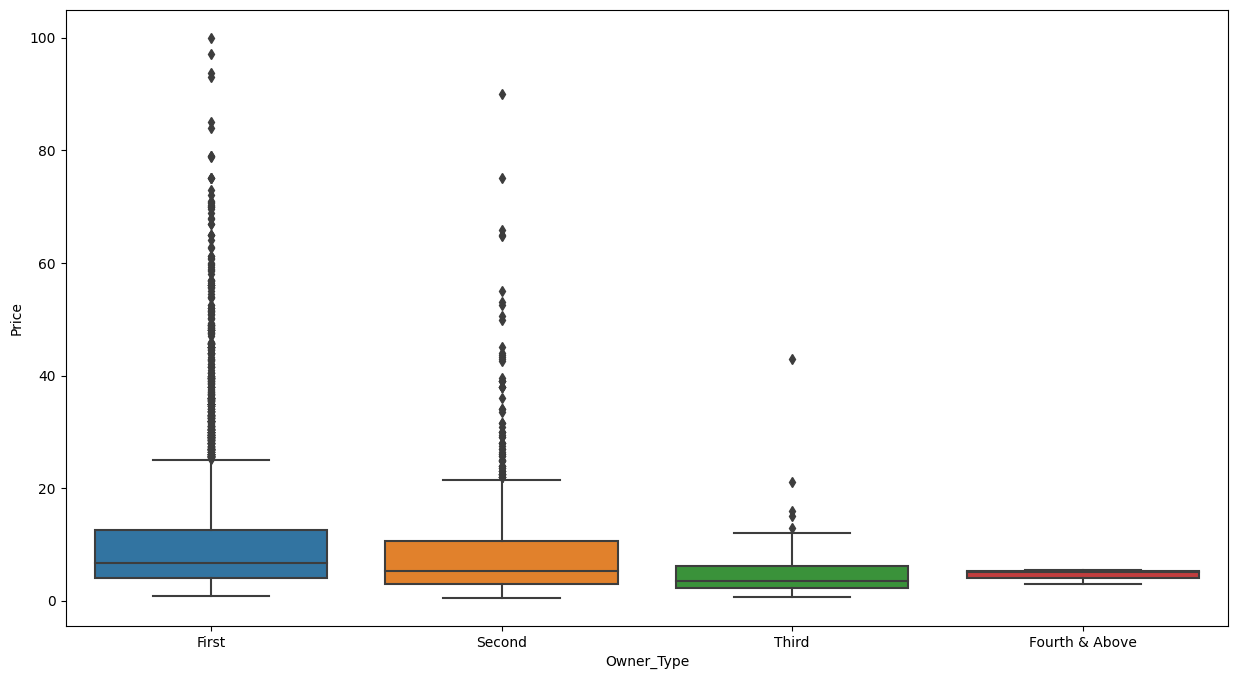

In [90]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(y="Price", x="Owner_Type", data=final_data)

In [91]:
final_data.Owner_Type.value_counts()

First             4076
Second             751
Third               70
Fourth & Above       3
Name: Owner_Type, dtype: int64

In [92]:
final_data.replace({'First':1,'Second':2,'Third':3,'Fourth & Above':4},inplace = True)

In [93]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4900 non-null   object 
 1   Year               4900 non-null   int64  
 2   Kilometers_Driven  4900 non-null   int64  
 3   Fuel_Type          4900 non-null   object 
 4   Transmission       4900 non-null   object 
 5   Owner_Type         4900 non-null   int64  
 6   Price              4900 non-null   float64
 7   Power_n            4900 non-null   float64
 8   Mileage_n          4900 non-null   float64
 9   Engine_n           4900 non-null   int32  
 10  Seat_n             4900 non-null   int32  
 11  Company            4900 non-null   object 
dtypes: float64(3), int32(2), int64(3), object(4)
memory usage: 479.8+ KB


#    # creating dummy variables

In [94]:
Transmission = final_data[["Transmission"]]

Transmission = pd.get_dummies(Transmission,drop_first=True)

Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [95]:
location = final_data[["Location"]]

location = pd.get_dummies(location,drop_first=True)

location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [96]:
Company = final_data[["Company"]]

Company = pd.get_dummies(Company,drop_first=True)

Company.head()

,Company_Audi,Company_BMW,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Honda,Company_Hyundai,Company_ISUZU,...,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_Porsche,Company_Renault,Company_Skoda,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [97]:
Fuel_Type = final_data[["Fuel_Type"]]

Fuel_Type = pd.get_dummies(Fuel_Type,drop_first=True)

Fuel_Type.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [98]:
data_train = pd.concat([final_data,Company ,location ,Transmission,Fuel_Type ], axis = 1)

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               4900 non-null   object 
 1   Year                   4900 non-null   int64  
 2   Kilometers_Driven      4900 non-null   int64  
 3   Fuel_Type              4900 non-null   object 
 4   Transmission           4900 non-null   object 
 5   Owner_Type             4900 non-null   int64  
 6   Price                  4900 non-null   float64
 7   Power_n                4900 non-null   float64
 8   Mileage_n              4900 non-null   float64
 9   Engine_n               4900 non-null   int32  
 10  Seat_n                 4900 non-null   int32  
 11  Company                4900 non-null   object 
 12  Company_Audi           4900 non-null   uint8  
 13  Company_BMW            4900 non-null   uint8  
 14  Company_Chevrolet      4900 non-null   uint8  
 15  Comp

In [100]:
data_train.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Power_n,Mileage_n,Engine_n,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,Mumbai,2010,72000,CNG,Manual,1,1.75,58.16,26.60,998,...,0,0,0,0,1,0,1,0,0,0
1,Pune,2015,41000,Diesel,Manual,1,12.50,126.20,19.67,1582,...,0,0,0,0,0,1,1,1,0,0
2,Chennai,2011,46000,Petrol,Manual,1,4.50,88.70,18.20,1199,...,0,0,0,0,0,0,1,0,0,1


In [101]:
data_train.drop(['Location','Fuel_Type','Transmission','Company'],axis=1 , inplace = True)

In [102]:
data_train.shape

(4900, 49)

Feature Scaling

In [103]:
y=data_train['Price']
X=data_train.drop('Price',axis=1)

In [104]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4900 entries, 0 to 6018
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   4900 non-null   int64  
 1   Kilometers_Driven      4900 non-null   int64  
 2   Owner_Type             4900 non-null   int64  
 3   Price                  4900 non-null   float64
 4   Power_n                4900 non-null   float64
 5   Mileage_n              4900 non-null   float64
 6   Engine_n               4900 non-null   int32  
 7   Seat_n                 4900 non-null   int32  
 8   Company_Audi           4900 non-null   uint8  
 9   Company_BMW            4900 non-null   uint8  
 10  Company_Chevrolet      4900 non-null   uint8  
 11  Company_Datsun         4900 non-null   uint8  
 12  Company_Fiat           4900 non-null   uint8  
 13  Company_Force          4900 non-null   uint8  
 14  Company_Ford           4900 non-null   uint8  
 15  Comp

SPlit data set into train and test

In [105]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

# appling random forest without hyperparameter tunning

In [106]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)
y_pred= reg_rf.predict(X_test)
print("Accuracy on Traing set: ",reg_rf.score(X_train,y_train))
print("Accuracy on Testing set: ",reg_rf.score(X_test,y_test))

Accuracy on Traing set:  0.9872996089436111
Accuracy on Testing set:  0.8832737083134754


In [107]:
y_pred = reg_rf.predict(X_test)

In [108]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("\t\tError Table")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

		Error Table
Mean Absolute Error      :  1.6175019970845481
Mean Squared  Error      :  14.77169344751321
Root Mean Squared  Error :  3.8433960825698423
R Squared Error          :  0.8832737083134754


# Hyper parameter tunning

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

c:\Users\ASUS\AppData\Local\Programs\Python\Python39-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


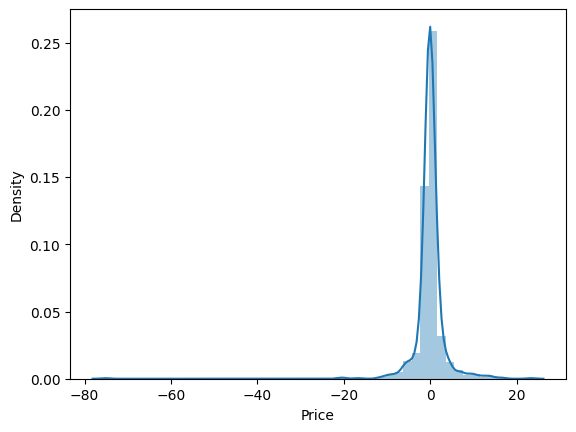

In [111]:
sns.distplot(y_test-y_pred)
plt.show()

In [112]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [113]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
# _______________________________________________________________________________________________
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# _______________________________________________________________________________________________

In [114]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

printing best parameter for madel (found by randomize search cv)

In [115]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [116]:
reg_rf1 = RandomForestRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25)

In [117]:
reg_rf1.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [118]:
prediction1=reg_rf1.predict(X_test)

In [119]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))
print('R Squared Error          : ', metrics.r2_score(y_test, prediction1))

print("Accuracy on Traing set: ",reg_rf1.score(X_train,y_train))

MAE: 1.4993581399818312
MSE: 10.621900979083852
RMSE: 3.259125799824832
R Squared Error          :  0.9160654723606757
Accuracy on Traing set:  0.9872756926811679


# Model

# Linear regression

In [120]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
print("Accuracy on Traing set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))

Accuracy on Traing set:  0.7962976674327155
Accuracy on Testing set:  0.7860275649470876


In [121]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

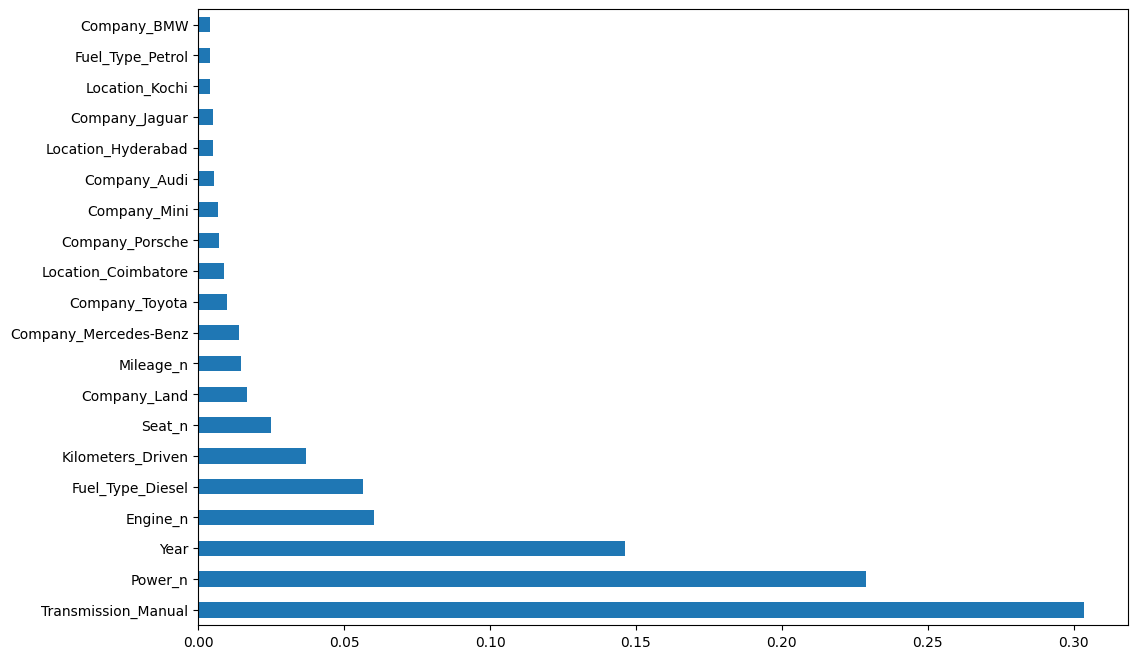

In [122]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# XGboosting regression

In [128]:
# import xgboost as xgb
from lightgbm import LGBMRegressor

In [129]:
# xgb_reg = xgb.XGBRegressor(n_estimators=400,gamma=0,max_depth=3)

# xgb_reg.fit(X_train, y_train)

# Create a LightGBM regressor object
lgbm_reg = LGBMRegressor(n_estimators=400, boosting_type='gbdt', learning_rate=0.1, max_depth=3)

# Train the model
lgbm_reg.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 3920, number of used features: 39
[LightGBM] [Info] Start training from score 10.661699
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMRegressor(max_depth=3, n_estimators=400)

In [130]:

# y_pred_xgb = xgb_reg.predict(X_test)

# Make predictions
y_pred_lgbm = lgbm_reg.predict(X_test)

In [132]:
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred_lgbm))

R Squared Error          :  0.8944732104828248


#### Dumping random forest - randomized search CV

In [133]:
import pickle
filename = 'rf_rscv.pkl'
pickle.dump(reg_rf1, open(filename, 'wb'))

In [134]:
tempmodel = pickle.load(open(filename, 'rb'))

In [135]:
predd = tempmodel.predict(X_test)

In [136]:

print('R Squared Error          : ', metrics.r2_score(y_test, predd))

R Squared Error          :  0.9160654723606757
